In [1]:
import hoomd
import hoomd.md

In [2]:
hoomd.context.initialize("");

HOOMD-blue v2.3.0 CUDA (8.0) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 
Compiled: 04/25/18
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
notice(2): NVIDIA driver not installed or is too old, ignoring any GPUs in the system.
HOOMD-blue is running on the CPU


In [3]:
hoomd.init.create_lattice(unitcell=hoomd.lattice.sc(a=2.0), n=5);

notice(2): Group "all" created containing 125 particles


In [4]:
nl = hoomd.md.nlist.cell();

In [5]:
lj = hoomd.md.pair.lj(r_cut=2.5, nlist=nl);

In [6]:
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0);

In [7]:
hoomd.md.integrate.mode_standard(dt=0.005);

In [8]:
all = hoomd.group.all();
hoomd.md.integrate.langevin(group=all, kT=0.2, seed=42);

notice(2): integrate.langevin/bd is using specified gamma values


In [9]:
hoomd.analyze.log(filename="log-output.log",
                  quantities=['potential_energy', 'temperature'],
                  period=100,
                  overwrite=True);

In [10]:
hoomd.dump.gsd("trajectory.gsd", period=2e3, group=all, overwrite=True);

In [12]:
hoomd.run(1e4);

** starting run **
Time 00:01:12 | Step 20000 / 20000 | TPS 3538.56 | ETA 00:00:00
Average TPS: 3524.14
---------
-- Neighborlist stats:
289 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 72 / n_neigh_avg: 25.104
shortest rebuild period: 19
-- Cell list stats:
Dimension: 3, 3, 3
n_min    : 0 / n_max: 26 / n_avg: 4.62963
** run complete **


In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output.log', skip_header=True);

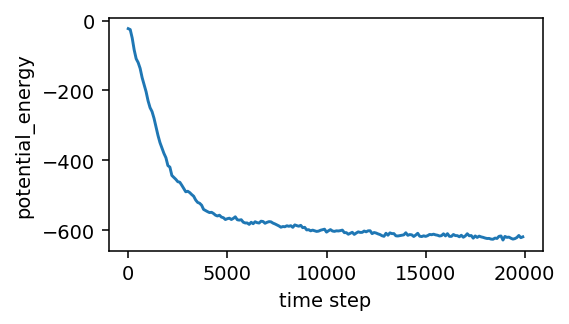

In [14]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');

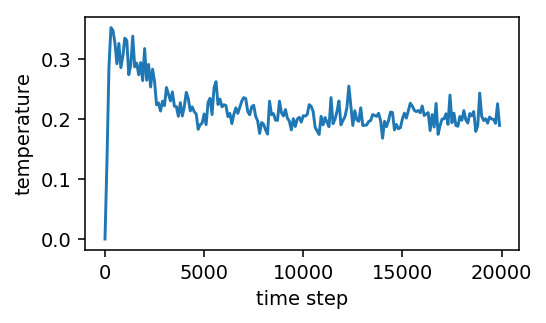

In [15]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,2]);
pyplot.xlabel('time step');
pyplot.ylabel('temperature');

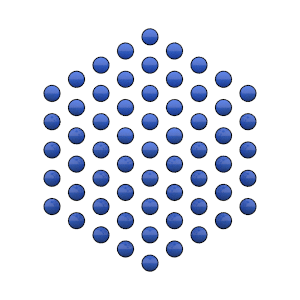

In [4]:
import ex_render
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory.gsd');

In [3]:
dir(ex_render)

['IPython',
 'PIL',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blue',
 'device',
 'display_movie',
 'fresnel',
 'gsd',
 'io',
 'math',
 'numpy',
 'orange',
 'path_tracer',
 'preview_tracer',
 'render_disk_frame',
 'render_disks',
 'render_polygon_frame',
 'render_sphere_frame',
 'sys']